# Примеры использования самоорганизующихся карт Кохонена для анализа пространственно-временных данных

## Дмитрий Колесов (kolesov.dm@gmail.com)

### NextGIS

# О чем пойдет речь

1. Где могут помочь самоорганизующиеся карты
2. Как они работают
3. Примеры использования
4. Развитие методов и близкие алгоритмы


# Что такое карты Кохонена (SOM)

<img src="Pics/SOMsPCA.PNG" width="50%">
(https://en.wikipedia.org/wiki/Self-organizing_map)

### Литература
 * Зиновьев А. Ю. Визуализация многомерных данных //Красноярск: Изд-во КГТУ,  2000.
 * Хайкин С. Нейронные сети: полный курс, 2-е издание. //Издательский дом Вильямс, 2008.
 * Кохонен Т. Самоорганизующиеся карты. Пер. с англ //М.: Бином. Лаборатория знаний, 2008.

# С чего начинается работа с данными


1. Сбор данных.
2. Рождение ТАБЛИЦЫ.

Type     | X1| X2| X3|X4|...
---------|----|--|--|--|---
.........|... |...|...|...|...
Единороги|1234|54|45|5|...
.........|... |...|...|...|...


# Таблица (данные)

* Таблица - содержит полное описание данных.
* Тяжело понять, есть ли тенденции в данных, что существенно, а что нет.

### Вопросы к данным:

* Стоит ли что-нибудь за данными и как они устроены?
* Возможно ли построить на данных сколько-нибудь разумную систему отношений/взаимосвязей?
* Какова эффективная размерность данных?

### Решение: построение модели

Два пути:

1. Сформулировать (стат)гипотезу, вывести закон.
2. Описать "как есть". **(<- подход SOM и др. алгоритмов/моделей)**



### SOM - это вариант кластерного анализа? Или же это алгоритм понижения размерности? Или это метод визуализации данных?
<img src="Pics/SOMsPCA.PNG" width="50%">
(https://en.wikipedia.org/wiki/Self-organizing_map)

* Методы понижения размерности: не уменьшают число примеров;
* Векторное квантование/кластеризация: не снижает размерность.

SOM: берет плюсы обоих подходов (и как не странно, почти не берет минусов).

# Немного теории

# Классика жанра: метод k-средних

https://ru.wikipedia.org/wiki/K-means

### On-line вариант:
1. Выбираем k.
2. Генерируем (случайным образом?) k центров (прототипов): $y_1$, $y_2$, ..., $y_k$, каждый прототип имеет ту же размерность, что и входные данные (т.е. это $n$-мерные вектора).
3. Выбираем случайным образом одну точку из входных данных: $x_i$.
4. Находим среди прототипов тот, который ближе всего лежит к $x_i$: $$y_{bmu} = \underset{j}{\mathrm{arg min}} (d(y_j, x_j))$$.
5. Сдвигаем выбранный прототип $y_{bmu}$  по направлению к $x_i$ с некоторым шагом $\lambda$: $$y'_{bmu} = y_{bmu} + \lambda (x_i - y_{bmu})$$.
6. Повторяем шаги 3--5 пока не надоест.

# Но что делать, если нам важна топология


1. Данные упорядочены в пространстве признаков и порядок важен.
2. Нет четких кластеров.
3. Ну и вообще, хочется посмотреть на данные глазами, а не только получить координаты прототипов.

# Алгоритм обучения SOM

1. Выбираем решетку прототипов/сетку узлов (одномерную, двумерную, трехмерную, ...).
2. Инициализируем сетку узлов (обычно случайным образом генерируются узлы в пространстве признаков): $y_1$, $y_2$, ..., $y_k$. Каждый узел имеет две пары координат: на сетке и в пространстве признаков.
3. Выбираем случайным образом одну точку из входных данных: $x_i$.
4. Находим среди узлов тот, который ближе всего лежит к $x_i$: $$y_{bmu} = \underset{j}{\mathrm{arg min}} (d(y_j, x_j))$$.
5. **Все узлы** $y_s$, лежащие на сетке около узла $y_{bmu}$, сдвигаются по направлению к $x_i$ с некоторым шагом, зависящим от соседсва $\lambda(r(y_s, y_{bmu}))$: $$y'_s = y_s + \lambda(r(y_s, y_{bmu})) (x_i - y_s).$$ Здесь $r(y_i, y_j)$ - расстояние между узлами на сетке, а не в пространстве прототипов.
6. Повторяем шаги 3--5 пока не надоест.

<img src="Pics/Cactus.png" width="50%">

# При чем здесь нейросети?

Дело в том, что вопрос вычисления расстояния $d(x_i, y_j)$ между узлами сетки и точками можно вычислять как сумму:
$$d(x_i, y_j) = \sum_{s=1}^n y_j^k x_i^k,$$
где $y_j^k$ и $x_i^k$ - $k$-я компонента векторов $y_j$ и $x_i$ соотвественно.

Сравните с сумматором нейрона:
$$ p = \sum_{s=1}^n w^k x_i^k$$

# Пример: динамика вегетационного индекса EVI
EVI: https://en.wikipedia.org/wiki/Enhanced_vegetation_index

Enhanced vegetation index| Примеры спектральных кривых
-|-
EVI - вегетационный индекс, предназначенный для мониторинга растительности с частичным учетом  влияния атмосферы: $$EVI = G \frac{NIR-RED}{NIR + C_1 RED - C_2 BLUE + L},$$ где $G, C_1, C_2, L$ - константы. | <img src="Pics/Reflectance.png" width="100%">

In [1]:
# Подгружаем библиотеки
library(MASS)
library('kohonen')

# Читаем данные
points = read.table('data/evi.csv', sep=',', header=T)
#Последние несколько строк таблицы
tail(points)

Loading required package: class


,fin_res_mod2003_01_01,fin_res_mod2003_01_17,fin_res_mod2003_02_02,fin_res_mod2003_02_18,fin_res_mod2003_03_06,fin_res_mod2003_03_22,fin_res_mod2003_04_07,fin_res_mod2003_04_23,fin_res_mod2003_05_09,fin_res_mod2003_05_25,⋯,fin_res_mod2015_08_29,fin_res_mod2015_09_14,fin_res_mod2015_09_30,fin_res_mod2015_10_16,fin_res_mod2015_11_01,fin_res_mod2015_11_17,fin_res_mod2015_12_03,fin_res_mod2015_12_19,x,y
153386,0.332,0.303,0.283,0.267,0.261,0.231,0.223,0.231,0.271,0.314,⋯,0.453,0.444,0.424,0.404,0.403,0.386,0.367,0.347,-10848633,2331969
153387,0.315,0.294,0.271,0.254,0.242,0.224,0.220,0.219,0.238,0.285,⋯,0.479,0.486,0.481,0.463,0.443,0.414,0.417,0.397,-10999831,2205181
153388,0.209,0.195,0.181,0.165,0.151,0.141,0.136,0.133,0.130,0.126,⋯,0.405,0.417,0.424,0.421,0.417,0.401,0.380,0.352,-11223947,2576377
153389,0.236,0.219,0.208,0.197,0.194,0.185,0.179,0.180,0.184,0.198,⋯,0.411,0.406,0.383,0.355,0.336,0.304,0.298,0.278,-10851588,2355867
153390,0.307,0.294,0.283,0.270,0.258,0.236,0.230,0.227,0.254,0.286,⋯,0.448,0.421,0.389,0.353,0.328,0.298,0.287,0.273,-10751829,2461024
153391,0.180,0.180,0.177,0.175,0.174,0.164,0.173,0.186,0.211,0.234,⋯,0.327,0.312,0.293,0.273,0.258,0.243,0.234,0.228,-10819901,2320996


In [2]:
options(repr.plot.width=5, repr.plot.height=4)

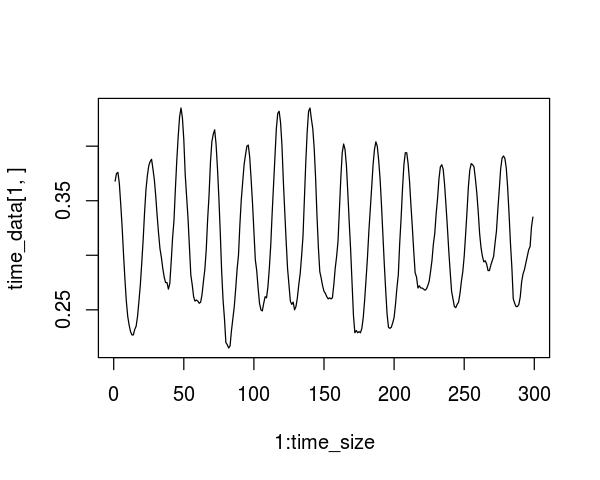

In [3]:
size = length(points[, 1])           # Число колонок
time_size = length(points) - 2       # Последние две колонки - координаты x,y 
time_data = points[, 1:time_size]    # Сохраним временные данные отдельно
plot(1:time_size, time_data[1, ], 'l')    # Строим график по первой точке


# Задача
### Забудем на время, что мы знаем о природных зонах, представим, что нам нужно понять, как устроены данные

Данные:
 * Чтобы было по-чесному, выкинем информацию о координатах.
 * Сделаем выборку 8.5 млрд пикселей -> ~ 150 тыс случайных точек.
 * Съемка ~ 1 раз в две недели с 2003 по 2015 годы (= 300 отсчетов).

Другими словами, нужно проанализировать около 150 тыс временных рядов и попытаться выявить, какие есть закономерности в них.

# Чем хорош SOM в этой задаче

* Удобен для работы с временными и пространственными данными (автокорреляция);
* Хорошо справляется с большими массивами данных, легко масштабируется.

# Первый же вопрос: размер сетки
* Зависимость положения сетки от отношения сторон:
<img src="Pics/Dimensions.png" width="50%">

* Зависимость разбиения пространства от количества узлов:
<img src="Pics/Dimensions1.png" width="50%">

# Обучение

In [4]:
# d.u = unique(time_sample)
# d.matr = dist(d.u)

# d.sam = sammon(d.matr)
# plot(d.sam$points)

[<img src="Pics/sammon.png" width="100%">](Pics/sammon.png)

In [5]:
# row = 4
# col = 7

# grd = somgrid(col, row, "hexagonal")
# d.som = som(as.matrix(time_sample), 
#             grid = grd, 
#             rlen=5000
# )
# plot(d.som)

[<img src="Pics/som_7x4_5000e.png" width="100%">](Pics/som_7x4_5000e.png)

[<img src="Pics/som_14x8_5000e.png" width="100%">](Pics/som_14x8_5000e.png)

1. Упорядоченность
2. Типы:

2.1. Нулевой EVI
2.2. Всегда высокий EVI
2.3. Выпуклости вверх и вниз
2.4. Большая амплитуда
2.5. Нет выпуклостей вниз с большой амплитудой

[<img src="Pics/som_y_14x8_5000e.png" width="100%">](Pics/som_y_14x8_5000e.png)

1. Упорядоченность
2. Типы: те же плюс большие промежутки между пиками (правая нижняя часть)

[<img src="Pics/som_y6_20x35_5000e1.png" width="100%">](Pics/som_y6_20x35_5000e1.png)

* Места, где ничего не растет (пустыни? льды?)
* Места, где растет всегда (эваториальные леса?)
* Места, где в январе не растет, но очень густо летом
* Места, где растет всегда, но июль - спад
* Ассиметрия пиков EVI

[Карта природных зон](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%B8%D1%80%D0%BE%D0%B4%D0%BD%D0%B0%D1%8F_%D0%B7%D0%BE%D0%BD%D0%B0)

* Гренладния: 666-20-1
* Сахара: 388-12-3

строка| столбец| № класса |место
------|--------|----------|------
20| 16| 681| сев америка
8| 26 | 271| север индостана (два урожая?)
2 | 26 | 56| север индостана
1 | 11| 11 | аргентина


<img src="Pics/som_y6_35x20_5000_count.png" width="100%">

<img src="Pics/som_y6_20x35_5000_quality.png" width="100%">

# Развитие идей

 * Переход к графовым представлениям внутри сетки, например [CONNvis](https://www.techfak.uni-bielefeld.de/~fschleif/mlr/mlr_05_2012.pdf).
 * Полный отказ от карт, [нейронный газ](https://ru.wikipedia.org/wiki/%D0%9D%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9_%D0%B3%D0%B0%D0%B7).